# Exploring the Data


In [1]:
##kaggle animal shelter outcome
###explore the data
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from pandas import DataFrame,merge
style.use("ggplot")
%matplotlib inline

In [2]:
#load the test data
animals = pd.read_csv('train.csv')
animals_test = pd.read_csv('test.csv')

In [3]:
#rows in training dataset
len(animals)

26729

### Overview Analysis


Count of dogs and cats in the shelter during the timeframe October 2013 to March 2016

<bound method NDFrame.describe of Dog    15595
Cat    11134
Name: AnimalType, dtype: int64>

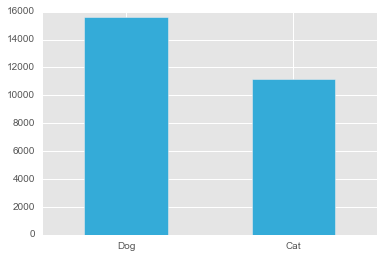

In [4]:
animaltype = animals['AnimalType'].value_counts() 
animaltype.plot(kind='bar', color='#34ABD8', rot=0)
animaltype.describe

Next, plot the different outcome type or distribution of outcome type. This is what we will ultimately predict.

Died                 197
Euthanasia          1555
Return_to_owner     4786
Transfer            9422
Adoption           10769
Name: OutcomeType, dtype: int64

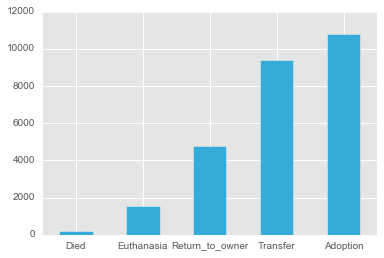

In [5]:
outcometype = animals.OutcomeType.value_counts().sort_values()
outcometype.plot(kind='bar', color='#34ABD8',rot=0)
outcometype

Next, looking at outcome types by dogs and cats. Looks the highest outcomes are generally adoptions and transfers with very low counts for natural death or euthanasia (relatively). 

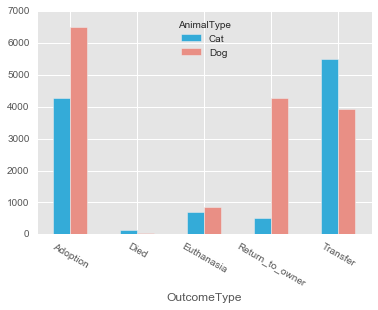

In [6]:
outcometype = animals[['AnimalType','OutcomeType']].groupby(['OutcomeType','AnimalType']).size()
#outcometype.unstack()
outcometype.unstack().plot(kind='bar', color=['#34ABD8','#E98F85'],rot=-30)

Next we look at the Sex Upon Outcome dimension

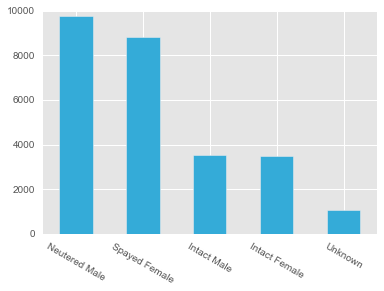

In [7]:
SexuponOutcome = animals['SexuponOutcome'].value_counts()
SexuponOutcome.plot(kind='bar',color=['#34ABD8'],rot=-30)

It would make more sense to split this series into two dimensions: 
1. Whether the animal has been spayed, neutered, remain intact, or unknown
2. Male, Female, or Unknown

In [8]:
sexType = animals['SexuponOutcome'].unique()
print(sexType)

['Neutered Male' 'Spayed Female' 'Intact Male' 'Intact Female' 'Unknown'
 nan]


In [9]:
# create a dict to use are a reference for creating new columns Sex, Neutered
M_F = {'Neutered Male':'Male','Spayed Female':'Female','Intact Male':'Male','Intact Female':'Female','Unknown':'Unknown'}
N_T = {'Neutered Male':'Neutered','Spayed Female':'Neutered','Intact Male':'Intact','Intact Female':'Intact','Unknown':'Unknown'}

animals['Sex'] = animals.SexuponOutcome.map(M_F)
animals['Neutered'] = animals.SexuponOutcome.map(N_T)

Next, we plot out for Sex and for Neutered Status

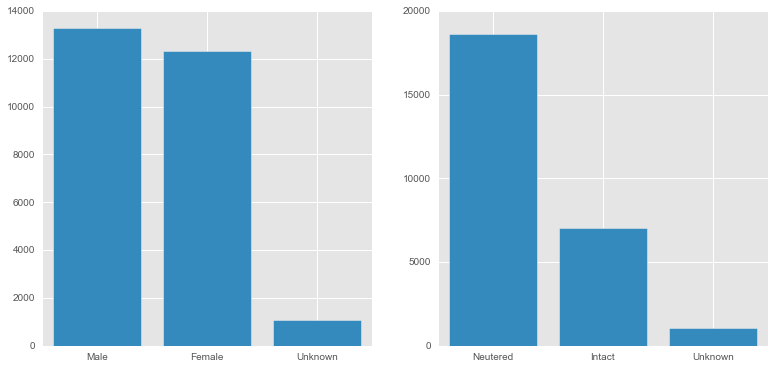

In [10]:
Sex = DataFrame(animals.Sex.value_counts())
Neutered = DataFrame(animals.Neutered.value_counts())

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,6))

# fig = plt.figure()
# ax1 = fig.add_subplot(1,2,1)
# ax2 = fig.add_subplot(1,2,2)

ax1.bar([1,2,3],Sex['Sex'],align='center')
ax1.set_xticks([1,2,3])
ax1.set_xticklabels(Sex.index)

ax2.bar([1,2,3],Neutered['Neutered'],align='center')
ax2.set_xticks([1,2,3])
ax2.set_xticklabels(Neutered.index)

Number of male or female animals about equivalent. More neutered animals than intact animals

Next, we can look at sex vs. outcome type

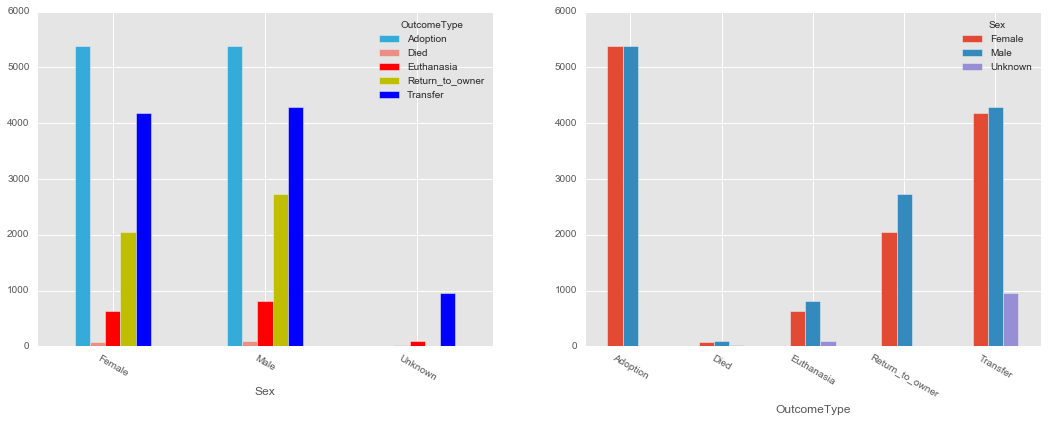

In [11]:
df = DataFrame(animals[['Sex','OutcomeType']])
OutcomeSex = df.groupby(['Sex','OutcomeType']).size().unstack()
SexOutcome = df.groupby(['OutcomeType','Sex']).size().unstack()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))

OutcomeSex.plot(kind='bar',color=['#34ABD8','#E98F85','r','y','b'],rot=-30, ax=ax1) 
SexOutcome.plot(kind='bar',rot=-30, ax=ax2)

Now we examine neutered status with outcome


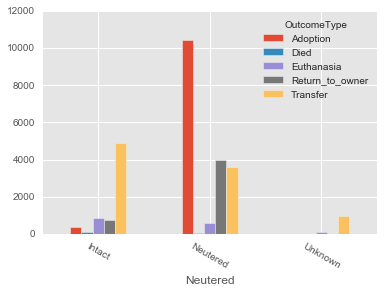

In [12]:
OT_N = animals[['OutcomeType','Neutered']].groupby(['Neutered','OutcomeType']).size().unstack()
OT_N.plot(kind='bar',rot=-30)

Examine by neutered status, outcomes by cats vs. dogs

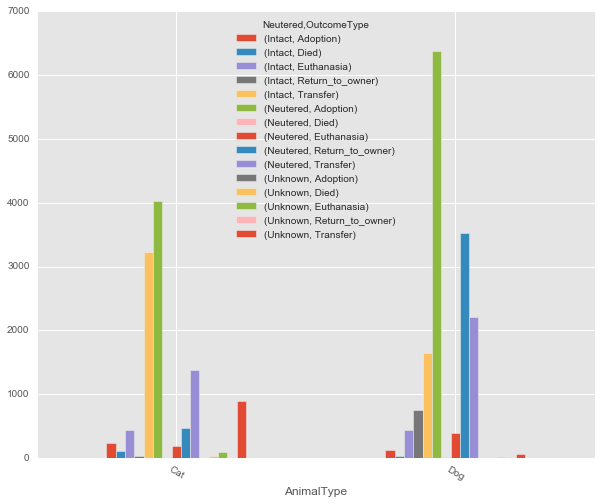

In [13]:
DC = animals[['OutcomeType','Neutered','AnimalType']].groupby(['AnimalType','OutcomeType','Neutered']).size().unstack().unstack()
DC.plot(kind='bar',stacked=False,figsize=(10,8),rot=-30)

### Additional Analysis

#### Looking at other features to see if they might show a relationship with outcome

Let's look at the top 10 breed of dog

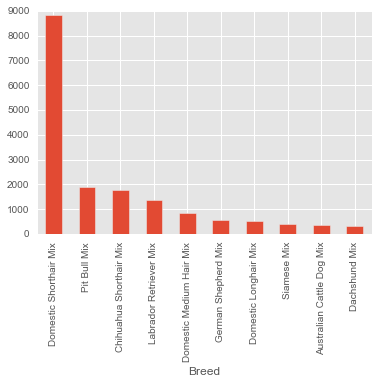

In [14]:
breed = animals.groupby('Breed').size()
breed.sort_values(ascending=False).head(10).plot(kind='bar')

In [15]:
len(animals.Breed.unique())

1380

Too many breeds to consider and most are mix.  This may not be a good feature to use to predict outcome.

In [16]:
# Lets look at the color of the animals
# animals.Color.unique()

# get primary_color
# get color_category

def get_primary_color(x):
    x = str(x)
    if (x.find('/')>=0): return x[0:x.find('/')]
    return x

def get_color_category(x):
    x = str(x)
    light_color = ['White','Cream Tabby','Blue','Blue Cream','Tan','Blue Tabby','Red','Silver','Orange Tabby','Calico',
                   'Torbie','Seal Point','Gray','Fawn','Flame Point','Red Tick','Blue Merle','Brown Merle','Lynx Point',
                   'Buff','Lilac Point','Apricot','Silver Tabby','Red Merle','Calico Point','Liver Tick','Gray Tabby',
                   'Chocolate Point','Gold','Cream','Pink','Blue Point','Tortie Point','Blue Tick','Orange','Blue Smoke', 
                   'Silver Lynx Point','Ruddy','Blue Tiger','Orange Tiger']
    dark_color = ['Black','Brown','Tortie','Chocolate','Brown Brindle','Yellow Brindle','Black Tabby','Sable','Lilac',
                  'Tricolor','Black Brindle','Black Smoke','Agouti','Yellow','Brown Tabby','Liver','Brown Tiger',
                  'Black Tiger']
   
    if x in light_color: 
        return 'Light'
    elif x in dark_color:
        return 'Dark'
    else:
        return 'Unknown'

In [17]:
animals['PrimaryColor'] = animals.Color.apply(get_primary_color)
animals['ColorCategory'] = animals.PrimaryColor.apply(get_color_category)

# Cleaning the Data - Prepping for Modeling

In [18]:
#convert DateTime and add DateTimeIn as a new column
animals['DateTime']=pd.to_datetime(animals.DateTime, infer_datetime_format=True)   

In [19]:
animals.head(10)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sex,Neutered,PrimaryColor,ColorCategory
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,Male,Neutered,Brown,Dark
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,Female,Neutered,Cream Tabby,Light
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,Male,Neutered,Blue,Light
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,Male,Intact,Blue Cream,Light
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,Male,Neutered,Tan,Light
5,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan,Female,Intact,Black,Dark
6,A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby,Male,Intact,Blue Tabby,Light
7,A701489,NaN,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby,Unknown,Unknown,Brown Tabby,Dark
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,NaN,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White,Female,Neutered,Red,Light
9,A677747,NaN,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White,Female,Neutered,White,Light


In [20]:
# converts or calculates age in terms of years
def calc_age_in_years(x):
    x=str(x)
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x.find('year')> -1: return age
    if x.find('month')> -1: return age/12.
    if x.find('week')> -1: return age/52.
    if x.find('day')> -1: return age/365.
    else: return 0
    
animals['AgeOutInYears'] = animals.AgeuponOutcome.apply(calc_age_in_years)
    

In [21]:
# convert all of the AgeuponOutcome values into weeks

def convert_AgeuponOutcome_to_weeks(df):
    result = {}
    for k in df['AgeuponOutcome'].unique():
        if type(k) != type(""):
            result[k] = -1
        else:
            v1, v2 = k.split()
            if v2 in ["year", "years"]:
                result[k] = int(v1) * 52
            elif v2 in ["month", "months"]:
                result[k] = int(v1) * 4.5
            elif v2 in ["week", "weeks"]:
                result[k] = int(v1)
            elif v2 in ["day", "days"]:
                result[k] = int(v1) / 7
                
    df['AgeOutInWeeks'] = df['AgeuponOutcome'].map(result).astype(float)
    #df = df.drop('AgeuponOutcome', axis = 1)
                
    return df

animals = convert_AgeuponOutcome_to_weeks(animals)
#test_df = convert_AgeuponOutcome_to_weeks(test_df)


In [22]:
animals.AnimalType.unique(),animals.Sex.unique(),animals.Neutered.unique(),animals.Breed.unique()

(array(['Dog', 'Cat'], dtype=object),
 array(['Male', 'Female', 'Unknown', nan], dtype=object),
 array(['Neutered', 'Intact', 'Unknown', nan], dtype=object),
 array(['Shetland Sheepdog Mix', 'Domestic Shorthair Mix', 'Pit Bull Mix',
        ..., 'Vizsla/Boxer', 'German Shepherd/Australian Kelpie',
        'Boxer/German Shepherd'], dtype=object))

In [23]:
def get_sex(x):
    x=str(x)
    if x.find('Male') >= 0: return 'male'
    if x.find('Female') >= 0: return 'female'
    return 'unknown'
def get_neutered(x):
    x=str(x)
    if x.find('Spayed') >= 0: return 'neutered'
    if x.find('Neutered') >= 0: return 'neutered'
    if x.find('Intact') >= 0: return 'intact'
    return 'unknown'

#looking at csv file, if 'Mix' in the desc then assume not purebred. ex.American Pit Bull Terrier Mix
def get_mix(x):
    x = str(x)
    if (x.find('Mix')>= 0) | (x.find('/')>=0): return 'mix'
    return 'not'

def encode_target(df, target_column):
    new_target= target_column + "_"
    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod[new_target] = df_mod[target_column].replace(map_to_int)

    return (df_mod, targets)

In [24]:
animals.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sex,Neutered,PrimaryColor,ColorCategory,AgeOutInYears,AgeOutInWeeks
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,Male,Neutered,Brown,Dark,1.000000,52.0
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,Female,Neutered,Cream Tabby,Light,1.000000,52.0
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,Male,Neutered,Blue,Light,2.000000,104.0
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,Male,Intact,Blue Cream,Light,0.057692,3.0
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,Male,Neutered,Tan,Light,2.000000,104.0


In [25]:
# df['Sex']=df.SexuponOutcome.apply(get_sex)
# df['Neutered']= df.SexuponOutcome.apply(get_neutered)
animals['Mix']= animals.Breed.apply(get_mix)


In [26]:
# replace all NaN from the feature columns to 'Unknown'
animals['Sex'] = animals.Sex.fillna(value='Unknown')
animals['Neutered'] = animals.Neutered.fillna(value='Unknown')

In [28]:
animals.groupby(['Mix']).size()

Mix
mix    25338
not     1391
dtype: int64

In [29]:
encode_animals = animals.copy()
encode_animals


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sex,Neutered,PrimaryColor,ColorCategory,AgeOutInYears,AgeOutInWeeks,Mix
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,Male,Neutered,Brown,Dark,1.000000,52.0,mix
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,Female,Neutered,Cream Tabby,Light,1.000000,52.0,mix
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,Male,Neutered,Blue,Light,2.000000,104.0,mix
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,Male,Intact,Blue Cream,Light,0.057692,3.0,mix
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,Male,Neutered,Tan,Light,2.000000,104.0,mix
5,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan,Female,Intact,Black,Dark,0.083333,4.5,mix
6,A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby,Male,Intact,Blue Tabby,Light,0.057692,3.0,mix
7,A701489,NaN,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby,Unknown,Unknown,Brown Tabby,Dark,0.057692,3.0,mix
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,NaN,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White,Female,Neutered,Red,Light,0.416667,22.5,mix
9,A677747,NaN,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White,Female,Neutered,White,Light,1.000000,52.0,not


In [47]:
# use get dummies
encode_feature_cols = pd.get_dummies(animals[['Sex','Neutered','Mix','ColorCategory']])

In [ ]:
# pd.get_dummies(kobe.combined_shot_type)
# combined_shot_type_dummies = pd.get_dummies(kobe.combined_shot_type)
# kobe = pd.concat([kobe, combined_shot_type_dummies], axis=1)

In [31]:
encode_animals = pd.concat([encode_animals, encode_feature_cols], axis=1)

In [34]:
encode_animals.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,...,Sex_Female,Sex_Male,Sex_Unknown,Neutered_Intact,Neutered_Neutered,Neutered_Unknown,Mix_mix,Mix_not,ColorCategory_Dark,ColorCategory_Light
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [29]:
# ecode_animals, Sex_ = encode_target(ecode_animals, "Sex")
# ecode_animals[['Sex_','Sex']].head()
# del ecode_animals['Target']


,Sex_,Sex
0,0,Male
1,1,Female
2,0,Male
3,0,Male
4,0,Male


In [30]:
# ecode_animals, Neutered_ = encode_target(ecode_animals, "Neutered")
# ecode_animals, Mix_ = encode_target(ecode_animals, "Mix")
# ecode_animals, ColorCategory_ = encode_target(ecode_animals, "ColorCategory")

In [31]:
# ecode_animals, OutcomeType_ = encode_target(ecode_animals, "OutcomeType")

In [32]:
# replace NaN with '0'    #done
# convert features to numeric values
# Animaltype: Dog = 1, Cat = 2  
# Neutered: Neutered = 1, Intact = 2, Unknown = 0
# Sex: Male =1, Female =2
# Mix: Mix =1, not= 2


In [33]:
list(encode_animals)

NameError: name 'ecode_animals' is not defined

['Sex_', 'Neutered_', 'Mix_', 'ColorCategory_']

In [48]:
# split training data into two sets using an 80/20 approach.  
# 80% of train data as a set for building the model, 20% of train data for testing as a validation set
# cut = int(len(train_df) * 0.8)
# _validation_df = train_df[cut:]
# _train_df = train_df[:cut]

# print(len(_train_df))
# print(len(_validation_df))

In [35]:
encode_animals

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,...,Sex_Female,Sex_Male,Sex_Unknown,Neutered_Intact,Neutered_Neutered,Neutered_Unknown,Mix_mix,Mix_not,ColorCategory_Dark,ColorCategory_Light
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
5,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6,A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
7,A701489,NaN,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,NaN,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
9,A677747,NaN,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


# Building a Model

#### Try a Decision Tree Classifier

In [36]:
import os
import subprocess

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn import cross_validation
from pandas import read_table, DataFrame
from os import system

In [39]:
features = list(encode_animals.columns[17:])
features

['Sex_Female',
 'Sex_Male',
 'Sex_Unknown',
 'Neutered_Intact',
 'Neutered_Neutered',
 'Neutered_Unknown',
 'Mix_mix',
 'Mix_not',
 'ColorCategory_Dark',
 'ColorCategory_Light']

In [41]:
y = encode_animals["OutcomeType"] # you don't need to convert the OutcomeType to number values
X = encode_animals[features]

In [42]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_train.shape, y_train.shape

((21383, 10), (21383,))

In [44]:
X_test.shape, y_test.shape

((5346, 10), (5346,))

In [45]:
dt = DecisionTreeClassifier(min_samples_split=20, random_state=99)
dt.fit(X_train, y_train)
dt.score(X_test, y_test)


0.61410400299289192

In [91]:
scores = cross_validation.cross_val_score(dt, X, y, cv=5)
scores

array([ 0.60620793,  0.60239387,  0.60991581,  0.60991581,  0.60872006])

In [92]:
print("Accuracy: %1.3f (+/- %1.3f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.607 (+/- 0.006)


In [83]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.
    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [84]:
%matplotlib inline
visualize_tree(dt, features)

In [85]:
#!dot -Tpng dt.dot -o dt.png

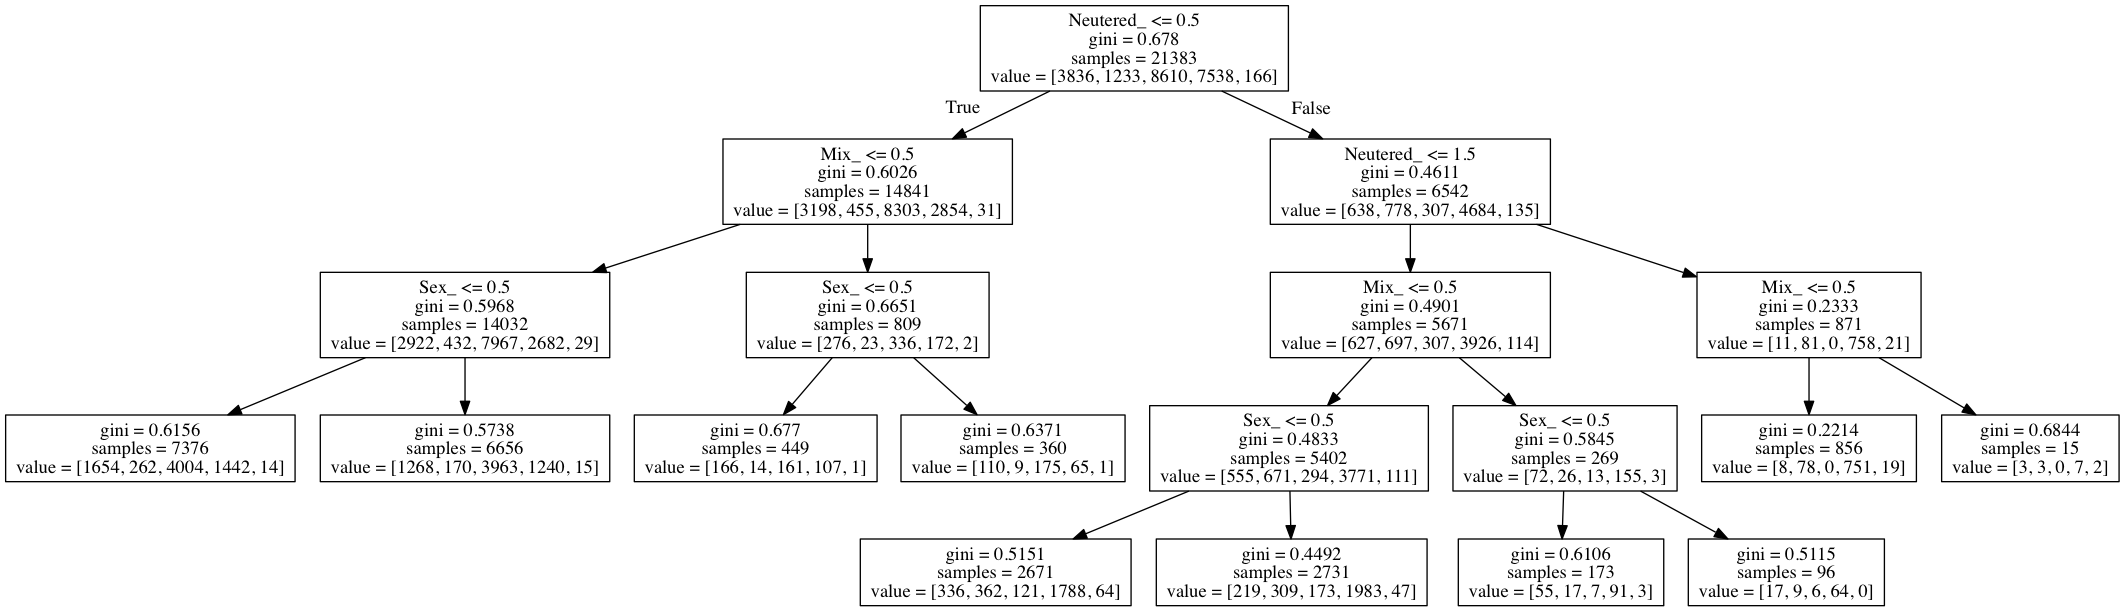

In [86]:
from IPython.display import Image
Image("dt.png", unconfined=False)

In [87]:
# PRINT OUT VARIABLE IMPORTANCE
print(DataFrame(dt.feature_importances_, columns = ["Imp"], index = X.columns).sort_values(['Imp'], ascending = False))

                Imp
Neutered_  0.971341
Mix_       0.017382
Sex_       0.011277


In [93]:
# prediction
# encode_animals['prediction'] = dt.predict(X)
y_test = dt.predict(X_test)
y_test
y_pred =dt.

array([2, 2, 3, ..., 3, 2, 2])

In [68]:
encode_animals.OutcomeType.unique(), encode_animals.OutcomeType_.unique()

(array(['Return_to_owner', 'Euthanasia', 'Adoption', 'Transfer', 'Died'], dtype=object),
 array([0, 1, 2, 3, 4]))

In [67]:
ecode_animals.head(30)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sex,Neutered,AgeOutInYears,AgeOutInWeeks,Mix,Sex_,Neutered_,Mix_,OutcomeType_,prediction
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,Male,Neutered,1.000000,52.0,mix,0,0,0,0,2
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,Female,Neutered,1.000000,52.0,mix,1,0,0,1,2
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,Male,Neutered,2.000000,104.0,mix,0,0,0,2,2
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,Male,Intact,0.057692,3.0,mix,0,1,0,3,3
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,Male,Neutered,2.000000,104.0,mix,0,0,0,3,2
5,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan,Female,Intact,0.083333,4.5,mix,1,1,0,3,3
6,A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby,Male,Intact,0.057692,3.0,mix,0,1,0,3,3
7,A701489,NaN,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby,Unknown,Unknown,0.057692,3.0,mix,2,2,0,3,3
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,NaN,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White,Female,Neutered,0.416667,22.5,mix,1,0,0,2,2
9,A677747,NaN,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White,Female,Neutered,1.000000,52.0,not,1,0,1,2,2


In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(ecode_animals.OutcomeType_, ecode_animals.prediction)

0.6078416700961502

In [71]:
y_val = ecode_animals.OutcomeType_
y_pred_val = ecode_animals.prediction
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_val, y_pred_val))
print("Accuracy: %1.3f" % accuracy_score(y_val, y_pred_val))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      4786
          1       0.00      0.00      0.00      1555
          2       0.56      0.97      0.71     10769
          3       0.72      0.62      0.67      9422
          4       0.00      0.00      0.00       197

avg / total       0.48      0.61      0.52     26729

Accuracy: 0.608


/Users/Tony/Desktop/GA_DC12/Anaconda_3/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:

X = kobe[['shot_distance','minutes_remaining']]
y = kobe['shot_made_flag']
#from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X, y)
kobe['pred'] = clf.predict(X)
# scatter plot that includes the regression line
plt.figure(figsize=(15,3))
plt.scatter(kobe.shot_distance, kobe.shot_made_flag)
plt.scatter(kobe.shot_distance, kobe.pred, color='red', alpha=0.1)
plt.xlabel('shot_distance')
plt.ylabel('shot_made_flag')

from sklearn.metrics import accuracy_score
accuracy_score(kobe.shot_made_flag, kobe.pred.round())

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, train_outcome, test_size=0.15)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_val, y_pred_val))
print("Accuracy: %1.3f" % accuracy_score(y_val, y_pred_val))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500, n_jobs=4)
forest.fit(X_train, y_train)

In [ ]:
y_pred_val = forest.predict(X_val)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_val, y_pred_val))
print("Accuracy: %1.3f" % accuracy_score(y_val, y_pred_val))


#### Try Random Forest Model

In [194]:
sex_dummies = pd.get_dummies(animals['Sex'])
sex_dummies.head()

,Female,Male,Unknown
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0


In [195]:
neut_dummies = pd.get_dummies(animals['Neutered'])
neut_dummies.head()

,Intact,Neutered,Unknown
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [197]:
animaltype_dummies = pd.get_dummies(animals['AnimalType'])
animaltype_dummies.head()

,Cat,Dog
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [1]:
animals.head()

NameError: name 'animals' is not defined

In [ ]:
# Use scikitlearn to build a Random Forest model
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, train_outcome, test_size=0.15)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500, n_jobs=4)
forest.fit(X_train, y_train)

In [ ]:
y_pred_val = forest.predict(X_val)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_val, y_pred_val))
print("Accuracy: %1.3f" % accuracy_score(y_val, y_pred_val))

In [ ]:
pd.get_dummies()

#### Try Boosting Classifier Model (AdaBoostClassifier)

In [ ]:
# build a classifier with scikit-learn

import sklearn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

A1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2),
                        n_estimators = 100,
                        learning_rate = 0.1)

classifiers = [c.fit(_train_df.values[:,1:-1] , _train_df.values[:,-1].astype(int)) for c in [A1]]
results = [c.predict_proba(_validation_df.values[:,1:-1]) for c in classifiers]
print(results[0])